In [ ]:
%matplotlib inline


Image-colored wordcloud
=======================

You can color a word-cloud by using an image-based coloring strategy
implemented in ImageColorGenerator. It uses the average color of the region
occupied by the word in a source image. You can combine this with masking -
pure-white will be interpreted as 'don't occupy' by the WordCloud object when
passed as mask.
If you want white as a legal color, you can just pass a different image to
"mask", but make sure the image shapes line up.



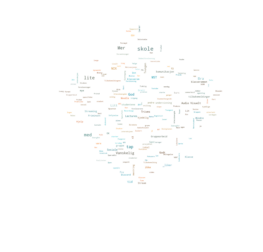

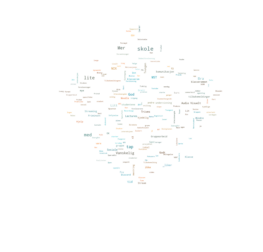

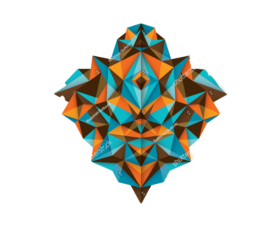

In [50]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

d = path.dirname("Visualisation/Wordcloud/")

# Read the whole text.
text = open(path.join(d,'svar.txt'),"r",encoding="ISO 8859-1").read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d,"abstract.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")
wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)
wc.recolor(color_func=image_colors)
wc.to_file(path.join(d, 'out.bmp'))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()